In [25]:

import osmnx as ox
import geopandas as gpd
from pathlib import Path 
import os
import sys

from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

In [34]:
prjDir=Path().absolute() / ".." 
print(prjDir)
sys.path.append(os.path.join("/home/charles/Projects/QcMtlStreets", "Python")) 


/home/charles/Projects/..


In [35]:
from OsmnxElev import *
print(ROOT_DIR)

/home/charles/Projects/QcMtlStreets/


In [2]:
gdf = ox.footprints.footprints_from_place(place='Quebec, Quebec, Canada')

In [10]:
print(type(gdf))
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


nodes amenity    building denomination religion source  \
35015   NaN     NaN         yes          NaN      NaN    NaN   
35017   NaN     NaN         yes          NaN      NaN    NaN   
35018   NaN     NaN  university          NaN      NaN    NaN   
35019   NaN     NaN  university          NaN      NaN    NaN   
35020   NaN     NaN         yes          NaN      NaN    NaN   

                                                geometry  \
35015  POLYGON ((-71.2754762 46.7810658, -71.275554 4...   
35017  POLYGON ((-71.27652430000001 46.7798666, -71.2...   
35018  POLYGON ((-71.27640959999999 46.779173, -71.27...   
35019  POLYGON ((-71.2769211 46.7759689, -71.27726939...   
35020  POLYGON ((-71.2753561 46.7762694, -71.2753031 ...   

                              name aerialway int_name  ...  \
35015  Pavillon Charles-De Koninck       NaN      NaN  ...   
35017    Pavillon Alexandre-Vachon       NaN      NaN  ...   
35018      Pavillon Adrien-Pouliot       NaN      NaN  ...   
35019        Pavillon Paul-Comtois       NaN      NaN  ...   
35020      Pavillon Agathe-Lacerte       NaN      NaN  ...   

      scuba_diving:courses scuba_diving:filling scuba_diving:rental  \
35015                  NaN                  NaN                 NaN   
35017                  NaN                  NaN                 NaN   
35018                  NaN                  NaN                 NaN   
35019                  NaN                  NaN                 NaN   
35020                  NaN                  NaN                 NaN   

      scuba_diving:repair                                            members  \
35015                 NaN             {27438232: 'inner', 27438194: 'outer'}   
35017                 NaN  {27438249: 'outer', 485588913: 'outer', 485588...   
35018                 NaN  {27438295: 'outer', 27438322: 'inner', 2743832...   
35019                 NaN             {27438433: 'outer', 27438438: 'inner'}   
35020                 NaN            {129737678: 'inner', 27438445: 'outer'}   

                                        contact:facebook  \
35015                                                NaN   
35017                                                NaN   
35018  https://www.facebook.com/pages/Universit%C3%A9...   
35019                                                NaN   
35020                                                NaN   

                                      contact:foursquare  \
35015                                                NaN   
35017                                                NaN   
35018  https://www.foursquare.com/v/4b55b428f964a5207...   
35019                                                NaN   
35020                                                NaN   

      name:etymology:wikidata name:etymology:wikipedia government  
35015                     NaN                      NaN        NaN  
35017                     NaN                      NaN        NaN  
35018                Q2825251        fr:Adrien_Pouliot        NaN  
35019                     NaN                      NaN        NaN  
35020                     NaN                      NaN        NaN  

[5 rows x 164 columns]

In [4]:
gdf.columns

Index(['nodes', 'amenity', 'building', 'denomination', 'religion', 'source',
       'geometry', 'name', 'aerialway', 'int_name',
       ...
       'scuba_diving:courses', 'scuba_diving:filling', 'scuba_diving:rental',
       'scuba_diving:repair', 'members', 'contact:facebook',
       'contact:foursquare', 'name:etymology:wikidata',
       'name:etymology:wikipedia', 'government'],
      dtype='object', length=164)

In [5]:
gdf.shape

(23820, 164)

In [6]:
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', 
                            save=True, show=False, close=True, filename='piedmont_bldgs', dpi=40)

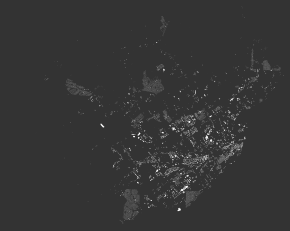

In [7]:
fig

In [48]:
# configure the inline image display
img_folder = os.path.join(ROOT_DIR,"Figures","BuildingFootprints")
extension = 'png'
size = 240

In [49]:

# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(place, 
              point, 
              network_type='drive',
              bldg_color='orange', 
              dpi=40,
              dist=805, 
              default_width=4, 
              street_widths=None):
    gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

In [50]:
#sjb 46.8114645,-71.2239493
#cap-rouge 46.7563193,-71.3439908
pointSjb = (46.8114645,-71.2239493)
pointCapRouge=(46.7563193,-71.3439908)

In [71]:
network_type='drive',
bldg_color='orange', 
dpi=40,
dist=805, 
default_width=4, 
street_widths=None
point=pointSjb
dist=805
placeSJB="SJBBuildings"
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)




In [84]:
fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type="drive", 
                                default_width=4,
                                    street_widths=street_widths, save=False, show=False, close=True)

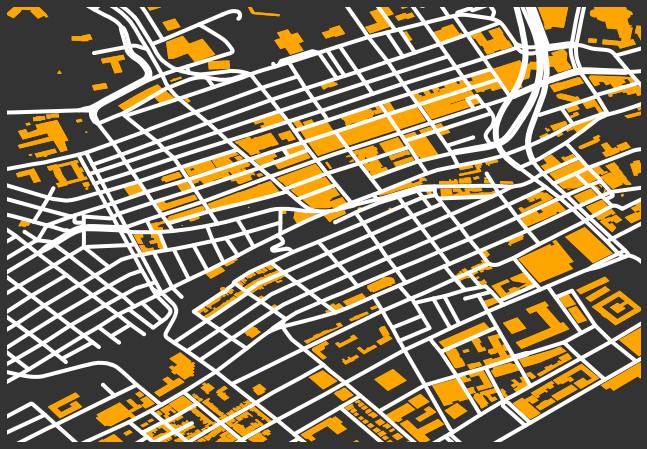

In [86]:
fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=True, close=True, filename=placeSJB, dpi=40)
fig

In [53]:
make_plot(placeSJB, pointSjb)

In [52]:
placeSJB="SJBBuildings"
make_plot(placeSJB, pointSjb)
Image('{}/{}.{}'.format(img_folder, placeSJB, extension), height=size, width=size)

FileNotFoundError: No such file or directory: '/home/charles/Projects/QcMtlStreets/Figures/BuildingFootprints/SJBBuildings.png'

FileNotFoundError: No such file or directory: '/home/charles/Projects/QcMtlStreets/Figures/BuildingFootprints/SJBBuildings.png'

<IPython.core.display.Image object>

In [ ]:
placeCapRouge="CapRougeBuildings"
make_plot("CapRougeBuildings", pointCapRouge)
Image('{}/{}.{}'.format(img_folder, placeCapRouge, extension), height=size, width=size)

In [36]:
gdf.area[:3]

35015    9.367408e-07
35017    1.203402e-06
35018    1.674326e-06
dtype: float64

In [38]:
shpQcCity = gpd.read_file(os.path.join(ROOT_DIR, "Data", "GeoData", "Neighbourhoods", "vdq-quartier.shp"))

In [ ]:
shpQcCity.intersection()